In [1]:
import os
import sys
import inspect

# Insert modules directory, TODO create setup.py file
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
reports_dir = os.path.dirname(currentdir)
project_home_dir = os.path.dirname(reports_dir)
sys.path.insert(0, f"{project_home_dir}/qcnn")

In [2]:
%matplotlib widget
import os
import numpy as np
import pandas as pd
import math

import sklearn
import librosa

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import tensorflow as tf


import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import simpleaudio as sa
import wave
from data_utility import DataUtility
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import ipympl
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from data_exploration import run_preprocess_experiment
# Use 3 decimal places in output display
pd.set_option("display.precision", 3)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

In [3]:
data_path = f"{project_home_dir}/data/archive/Data/features_30_sec.csv"
target = "label"
raw = pd.read_csv(data_path)
data_utility = DataUtility(raw, target=target, default_subset="modelling")
columns_to_remove = ["filename", "length"]
data_utility.update(columns_to_remove, "included", {"value": False, "reason": "manual"})

In [4]:
X, y, Xy = data_utility.get_samples(raw)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=41,
)
data_utility.row_sample["train"] = X_train.index
data_utility.row_sample["test"] = X_test.index

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
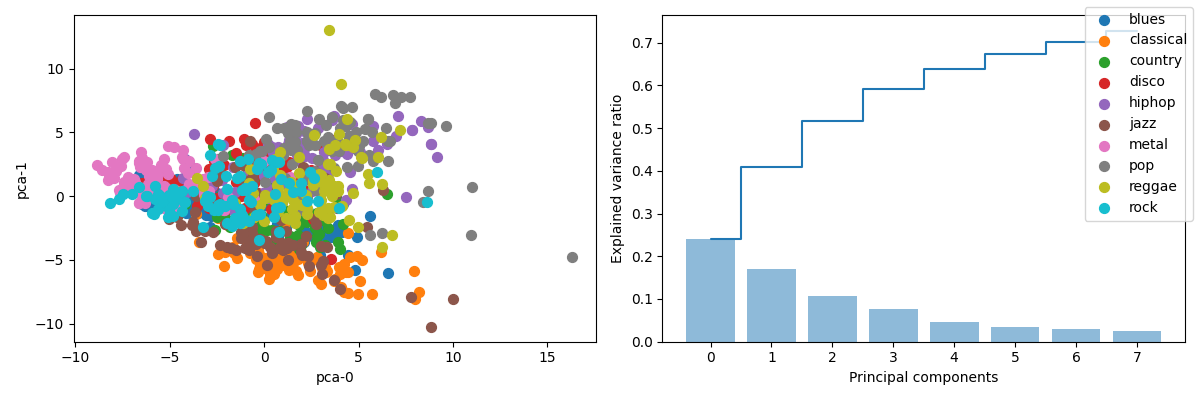

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
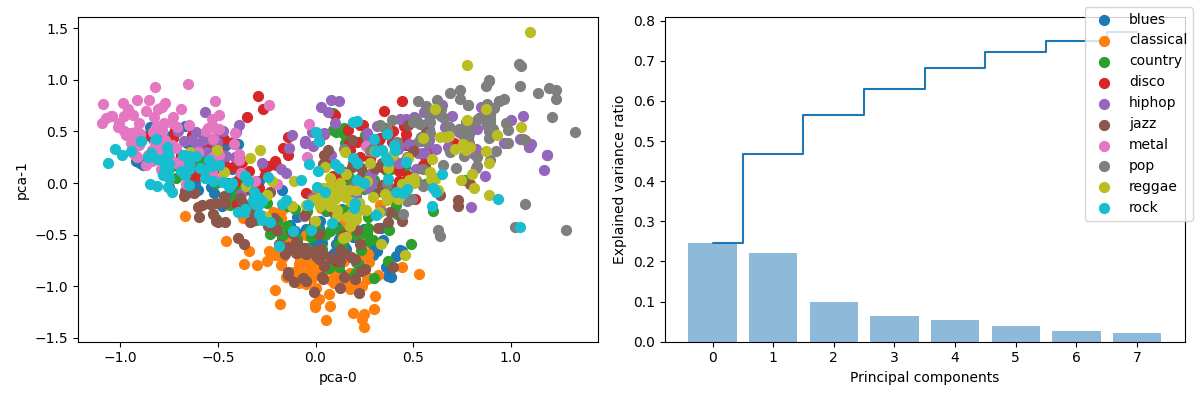

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
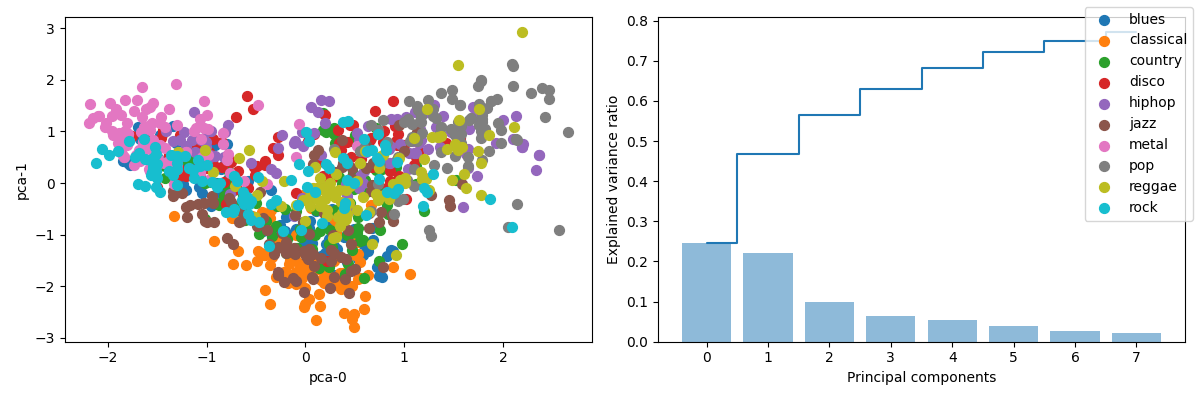

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
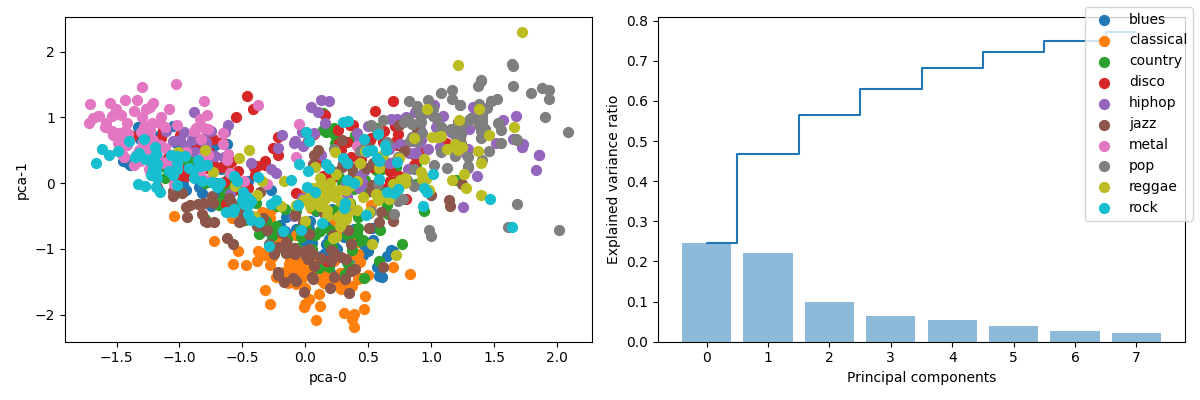

In [5]:
config = {
    "scaler": {
        "method": ["standard", "minmax"],
        "standard_params": {},
        "minmax_params": {"feature_range": [(0, 1), (-1, 1), (0, np.pi / 2)]},
    },
    "feature_selection": {
        "method": ["pca"],
        "pca_params": {"n_components": [8]},
        "tree_params": {"max_features": [2], "n_estimators": [50]},
    },
}
run_preprocess_experiment(config, X, y, data_utility, figsize=(12,4))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
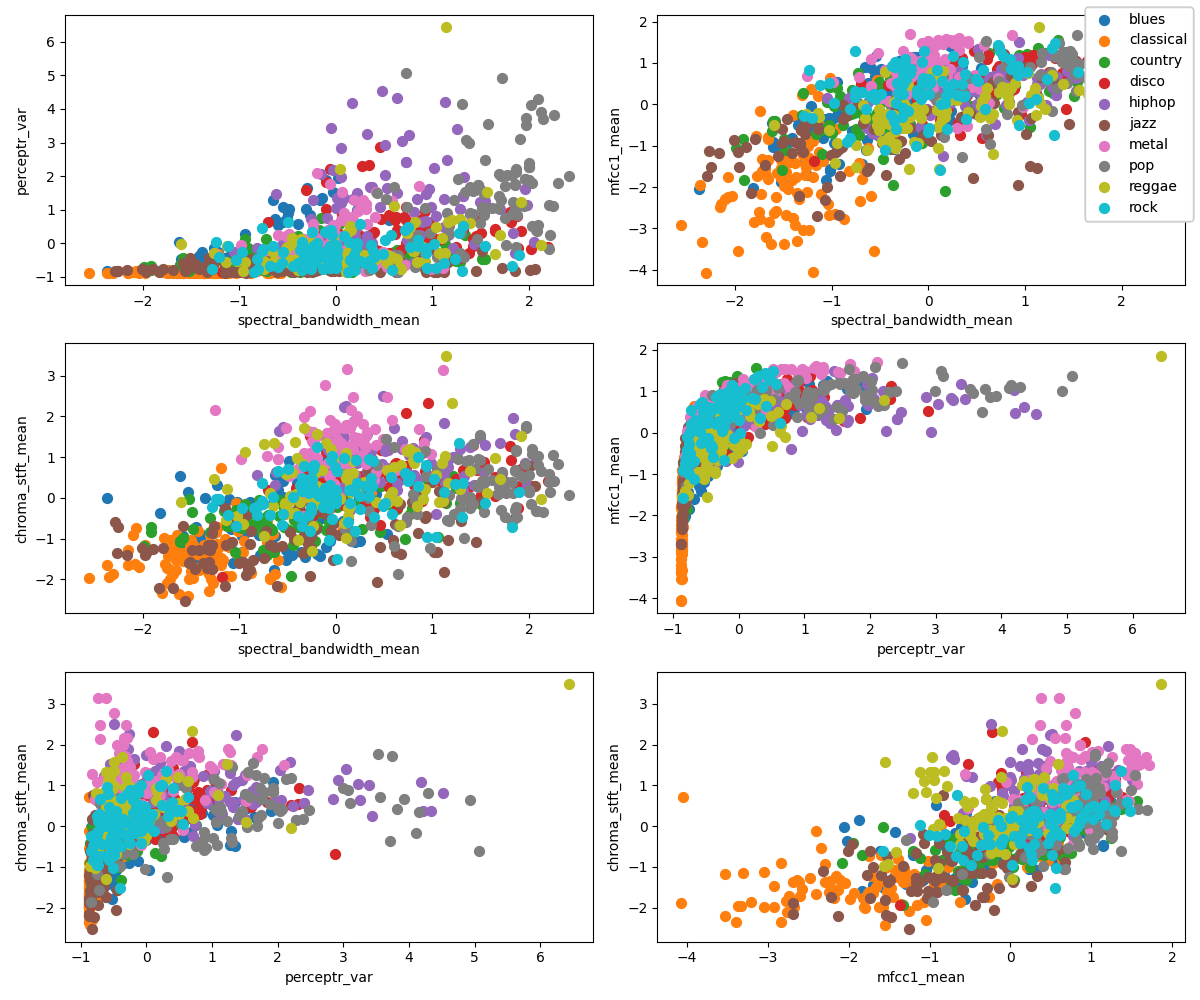

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
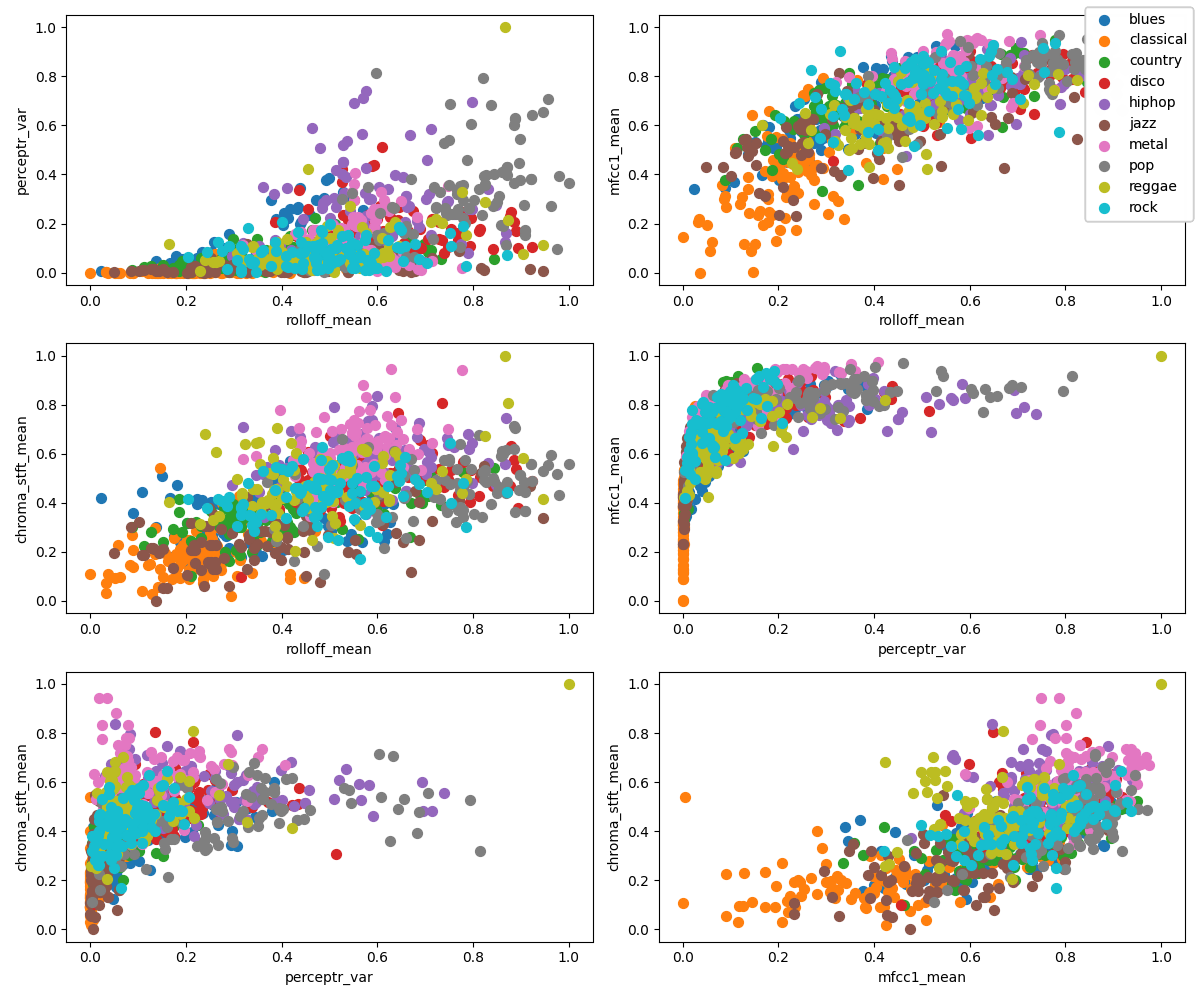

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
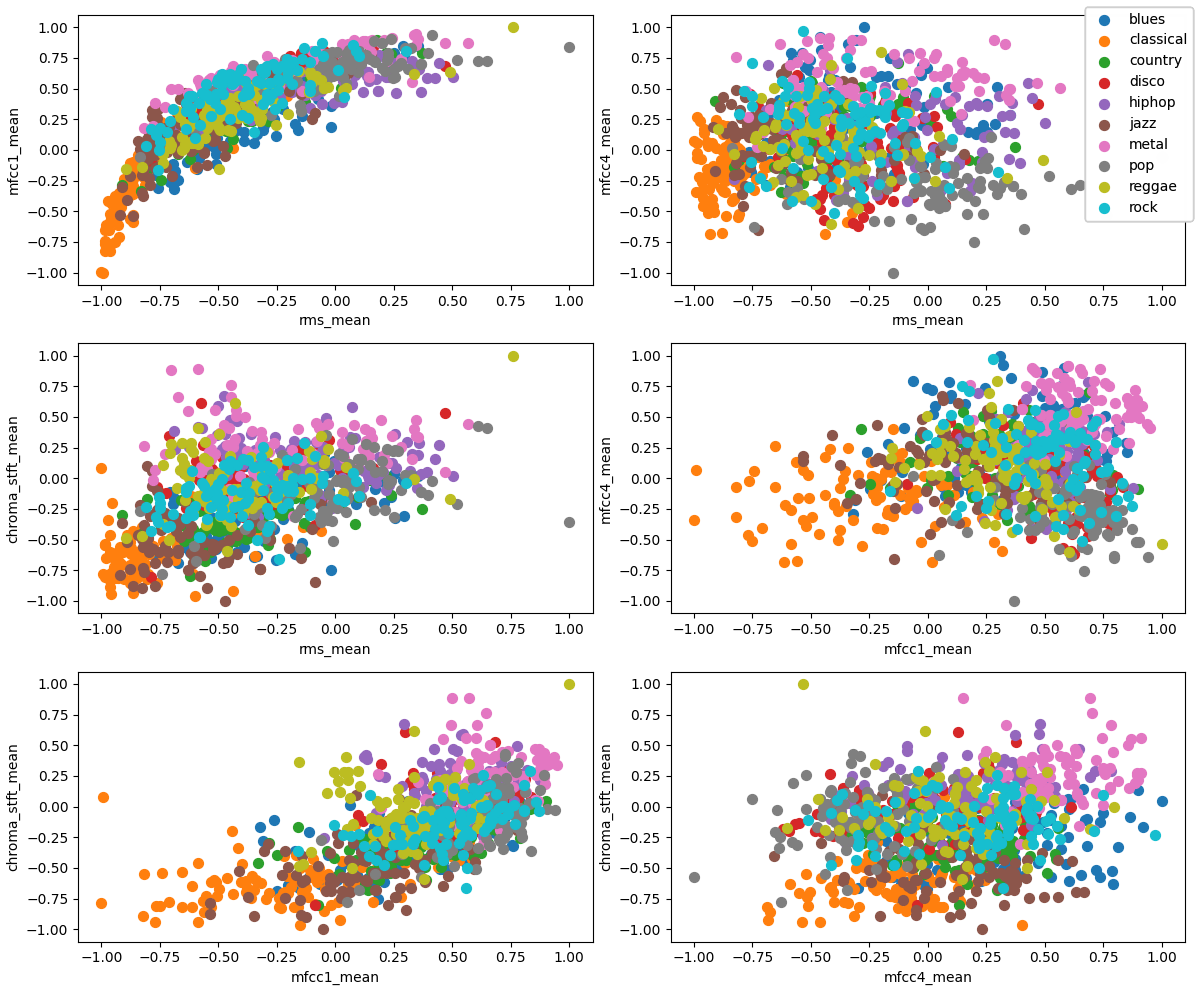

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
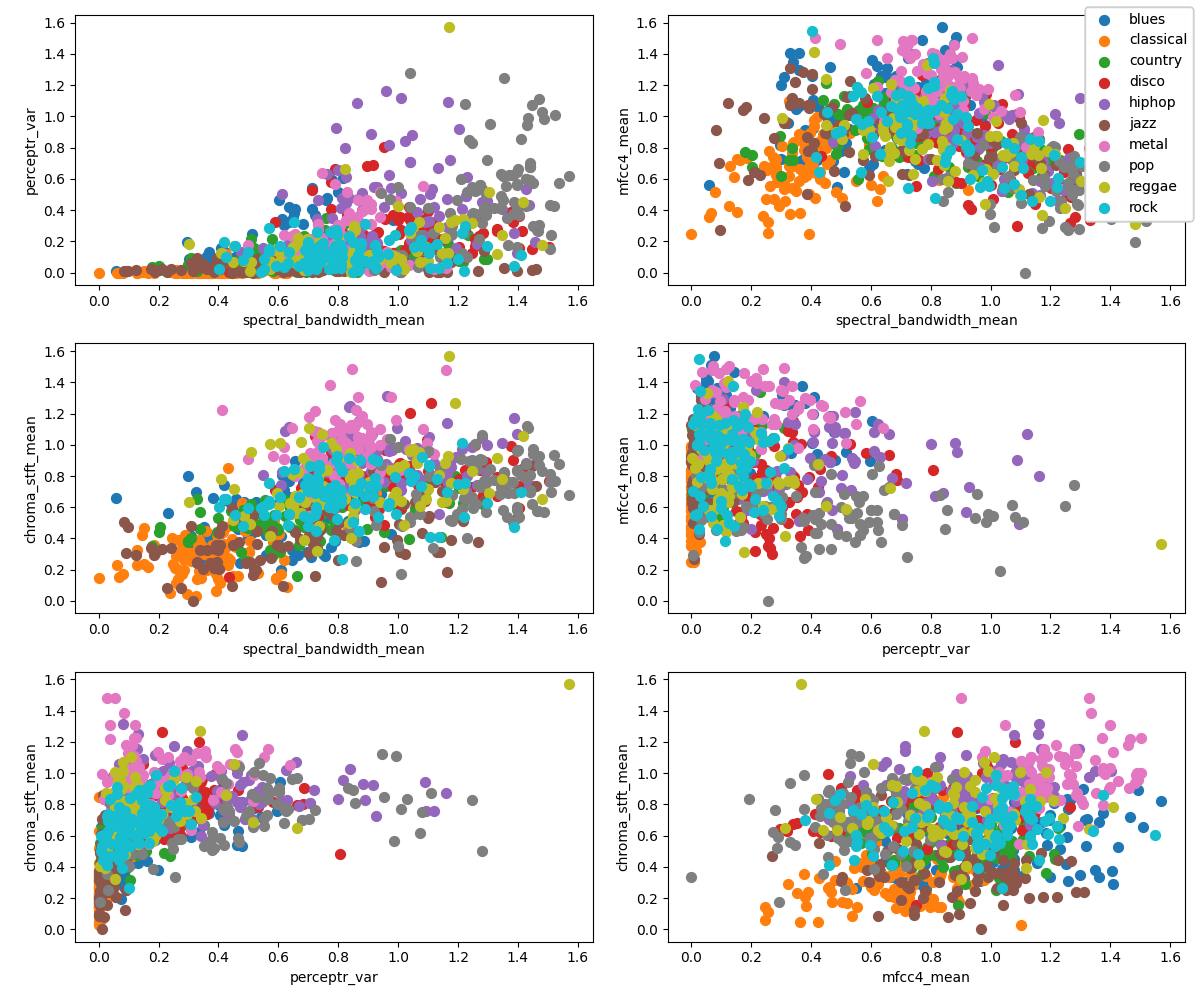

In [6]:
config = {
    "scaler": {
        "method": ["standard", "minmax"],
        "standard_params": {},
        "minmax_params": {"feature_range": [(0, 1), (-1, 1), (0, np.pi / 2)]},
    },
    "feature_selection": {
        "method": ["tree"],
        "pca_params": {"n_components": [8]},
        "tree_params": {"max_features": [4], "n_estimators": [50]},
    },
}
run_preprocess_experiment(config, X, y, data_utility, figsize=(12, 10))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
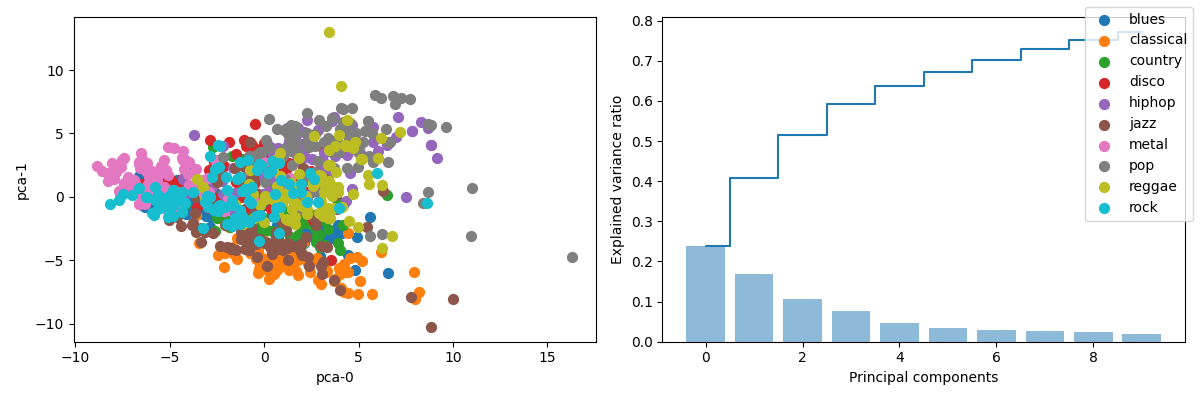

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
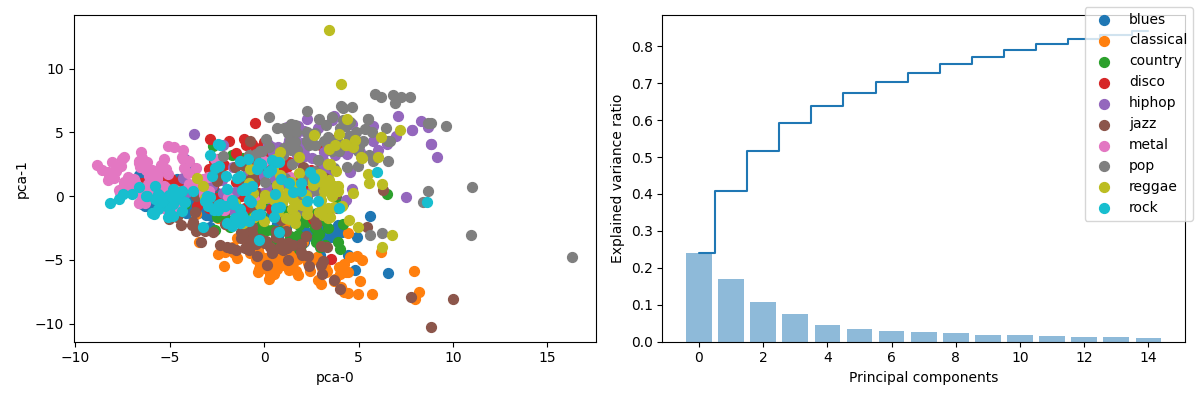

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
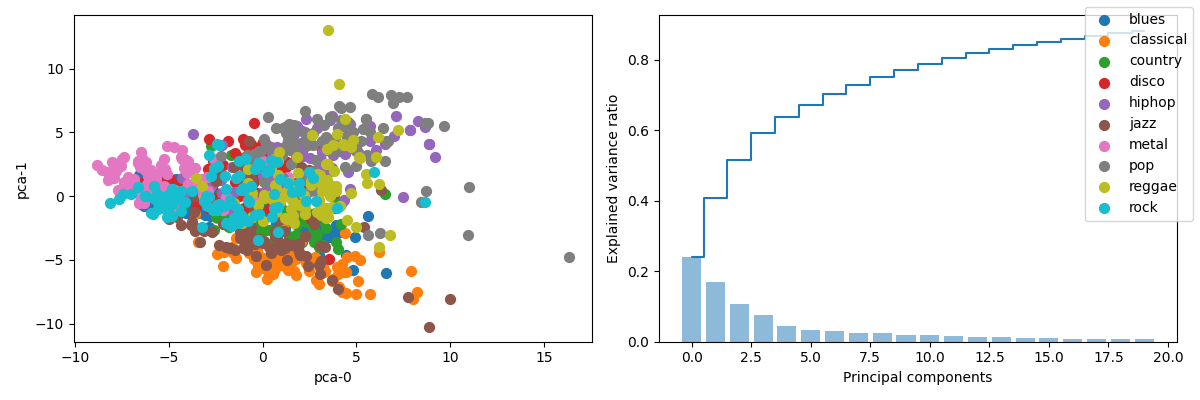

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
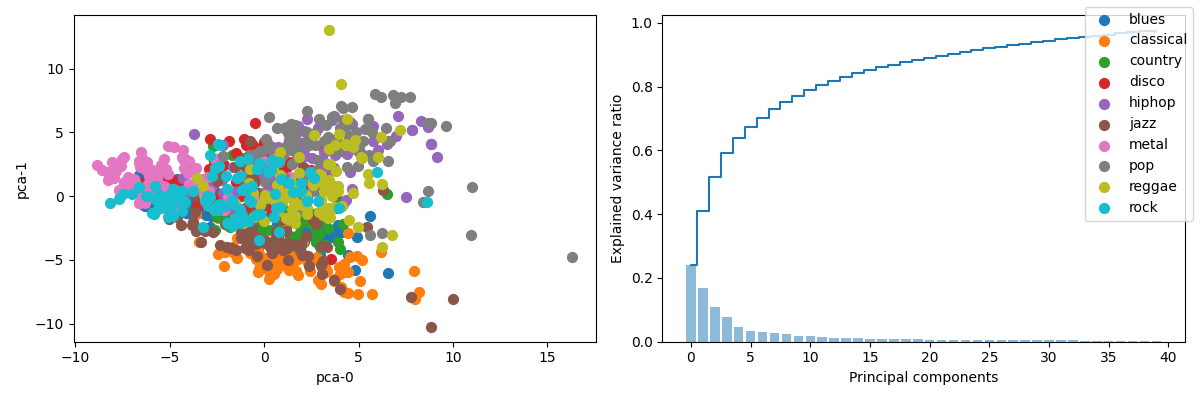

In [ ]:
config = {
    "scaler": {
        "method": ["standard"],
        "standard_params": {},
        "minmax_params": {"feature_range": [(0, 1), (-1, 1), (0, np.pi / 2)]},
    },
    "feature_selection": {
        "method": ["pca"],
        "pca_params": {"n_components": [8, 10, 15, 20, 40]},
        "tree_params": {"max_features": [2], "n_estimators": [50]},
    },
}
run_preprocess_experiment(config, X, y, data_utility, figsize=(12,4))